In [0]:
import pyspark.pandas as psd
import databricks.koalas as ks
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession
import sweetviz as sw

In [0]:
#df = spark.read.format("csv")\
#.option("header", "True")\
#.option("inferSchema","True")\
#.load("/FileStore/tables/Landing/train.csv")

In [0]:
df_parquet= ks.read_parquet("/FileStore/tables/Processing/dados_tratados.parquet")

In [0]:
df_parquet = df_parquet.toPandas()

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:4901: FutureWarning: DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.
  warnings.warn(


In [0]:
df_parquet.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_num,vehicle_damage_num,gender_num,annual_premmium
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,1,0,40454.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0,33536.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,1,0,38294.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,0,0,28619.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,1,27496.0


In [0]:
df_parquet = df_parquet.rename(columns=str.lower)
df_parquet.columns = df_parquet.columns.str.replace(' ','_')

Out[8]: <AxesSubplot:xlabel='gender', ylabel='count'>

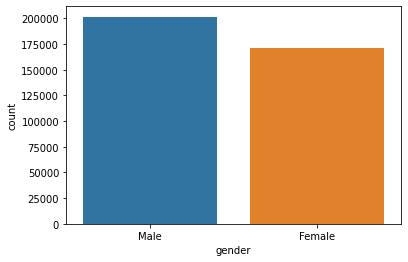

In [0]:
sns.countplot(data = df_parquet, x = 'gender')

Out[9]: <AxesSubplot:xlabel='age', ylabel='count'>

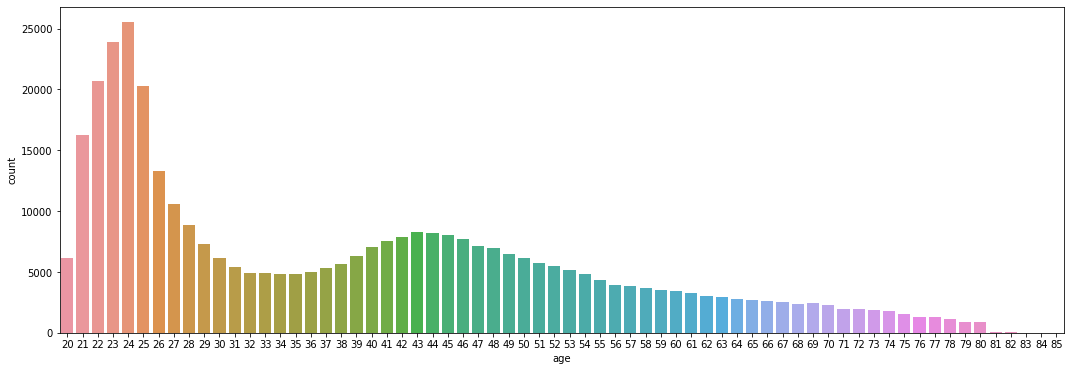

In [0]:
plt.subplots(figsize=(18,6))   
sns.countplot(data = df_parquet, x = 'age')

In [0]:
# Maior número de pessoas de 21 a 26 anos

Out[11]: <AxesSubplot:xlabel='driving_license', ylabel='count'>

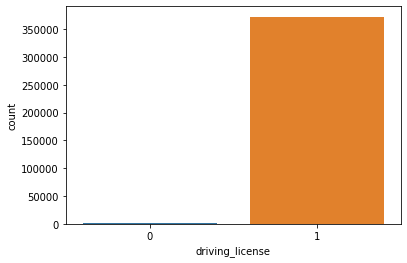

In [0]:
sns.countplot(data = df_parquet, x = 'driving_license')

In [0]:
df_parquet[df_parquet['driving_license'] == 0]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_num,vehicle_damage_num,gender_num,annual_premmium
547,564,Male,69,0,33.0,0,1-2 Year,Yes,39730.0,26.0,53,0,1,1,0,39730.0
1033,1062,Male,71,0,3.0,0,1-2 Year,No,25323.0,26.0,179,0,1,0,0,25323.0
1716,1762,Female,58,0,28.0,0,1-2 Year,Yes,53047.0,122.0,214,0,1,1,1,53047.0
1943,1991,Male,66,0,8.0,0,1-2 Year,No,48063.0,25.0,231,0,1,0,0,48063.0
2313,2366,Female,52,0,45.0,1,1-2 Year,No,33283.0,26.0,152,0,1,0,1,33283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371984,379870,Male,65,0,8.0,0,> 2 Years,Yes,42230.0,26.0,65,0,2,1,0,42230.0
372200,380089,Male,67,0,16.0,0,> 2 Years,Yes,28195.0,124.0,122,0,2,1,0,28195.0
372641,380538,Male,57,0,28.0,0,1-2 Year,Yes,48647.0,122.0,144,0,1,1,0,48647.0
372701,380600,Male,67,0,11.0,1,1-2 Year,No,36953.0,26.0,135,0,1,0,0,36953.0


In [0]:
# Há poucas pessoas que não possuem carteira de motorista

Out[14]: <AxesSubplot:xlabel='region_code', ylabel='count'>

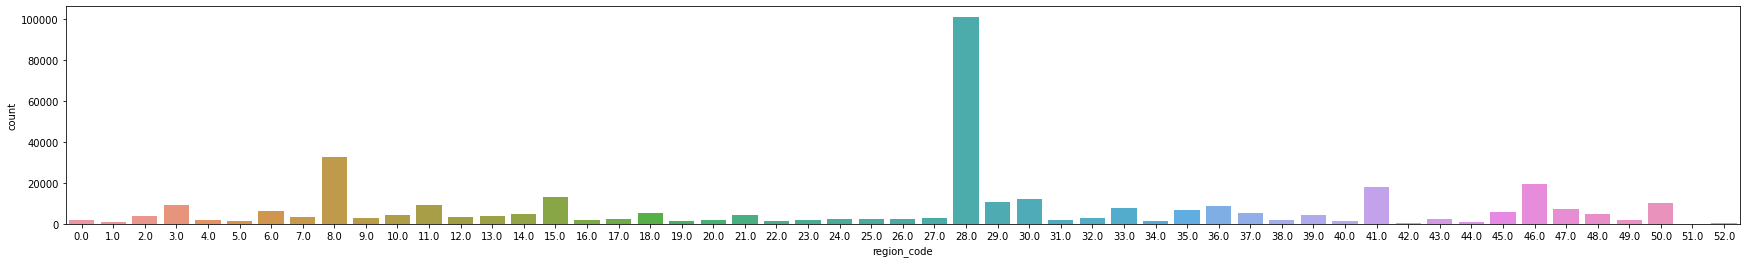

In [0]:
plt.subplots(figsize=(30,4))   
sns.countplot(data = df_parquet, x = 'region_code')

In [0]:
# Concentração maior de pessoas na região 28.0

Out[16]: <AxesSubplot:xlabel='previously_insured', ylabel='count'>

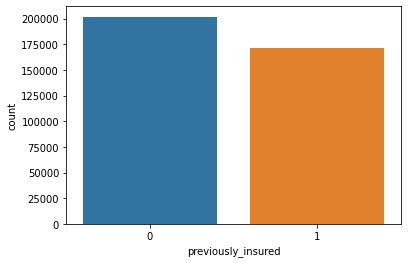

In [0]:
sns.countplot(data = df_parquet, x = 'previously_insured')

Out[17]: <AxesSubplot:xlabel='vehicle_age', ylabel='count'>

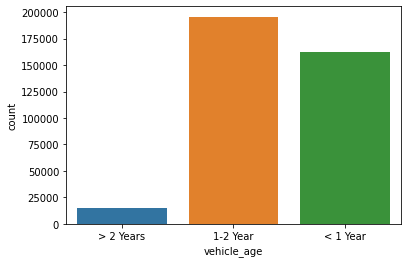

In [0]:
sns.countplot(data = df_parquet, x = 'vehicle_age')

In [0]:
# Não há muita representatividade de pessoas que possuem carros com mais de 2 anos

Out[19]: <AxesSubplot:xlabel='vehicle_damage', ylabel='count'>

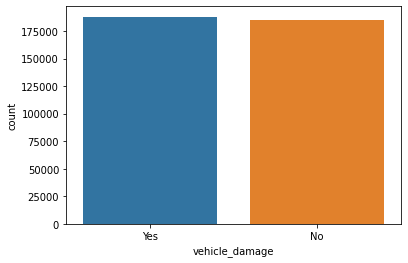

In [0]:
sns.countplot(data = df_parquet, x = 'vehicle_damage')

Out[20]: <AxesSubplot:xlabel='response', ylabel='count'>

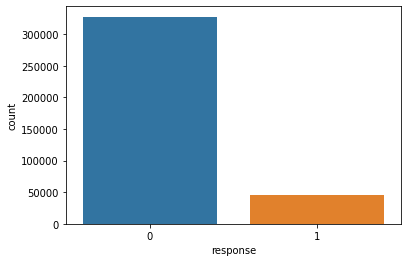

In [0]:
sns.countplot(data = df_parquet, x = 'response')

In [0]:
# Dataset desbalanceado, muitas pessoas que não estão interessadas no seguro comparadas com pessoas que estão.

Out[22]: <AxesSubplot:>

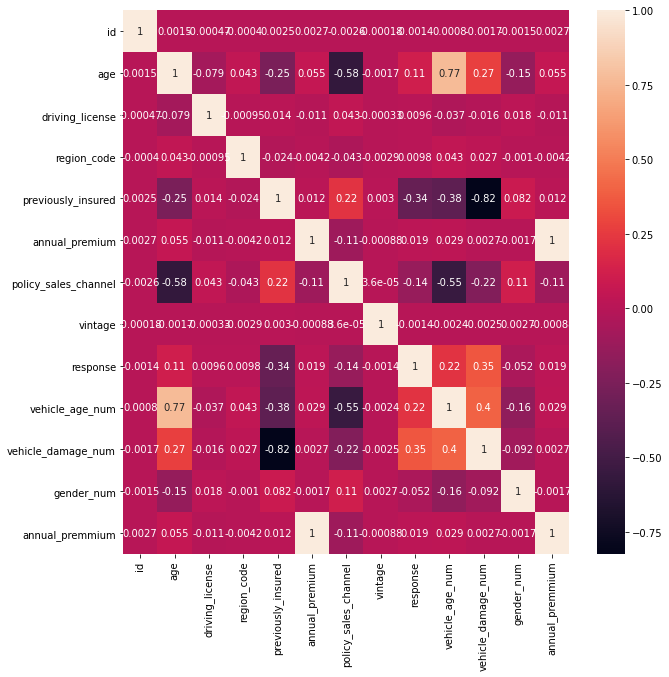

In [0]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df_parquet.corr(), annot=True, ax=ax)

Out[23]: <matplotlib.legend.Legend at 0x7f687b126fa0>

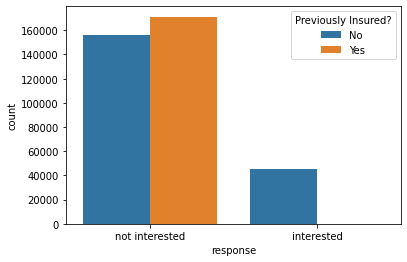

In [0]:
ax = sns.countplot(data = df_parquet, x = 'response', hue = 'previously_insured')
ax.set_xticklabels(['not interested', 'interested'])
plt.legend(title = "Previously Insured?", labels=['No', 'Yes'])

In [0]:
# No geral as pessoas não estão interessadas no seguro, porém, aquelas que estão, em sua maioria não tiveram seguro previamente

Out[25]: [Text(0, 0, 'not interested'), Text(1, 0, 'interested')]

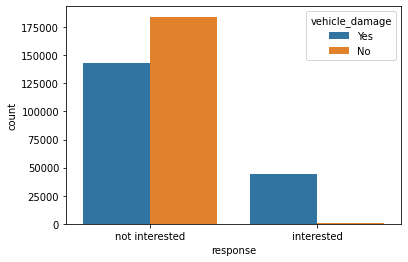

In [0]:
ax = sns.countplot(data = df_parquet, x = 'response', hue = 'vehicle_damage')
ax.set_xticklabels(['not interested', 'interested'])

In [0]:
# Das pessoas que estão interessadas no seguro, grande parte já teve algum sinistro em seu veículo

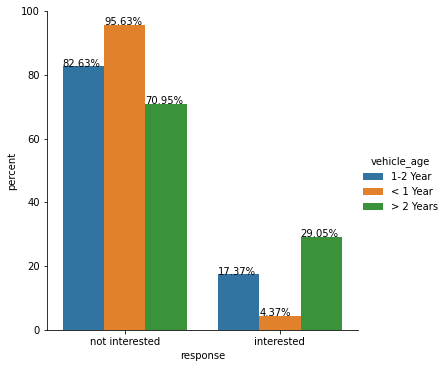

In [0]:
 x,y = 'response', 'vehicle_age'

df1 = df_parquet.groupby(y)[x].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.set_xticklabels(['not interested', 'interested'])
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [0]:
# Em relação ao interesse no seguro com a idade dos carros, percentualmente aqueles que tem mais interesse em comparação com os que não tem, são aqueles que tem os veículos com mais de dois anos

Out[29]: [Text(0, 0, 'not interested'), Text(1, 0, 'interested')]

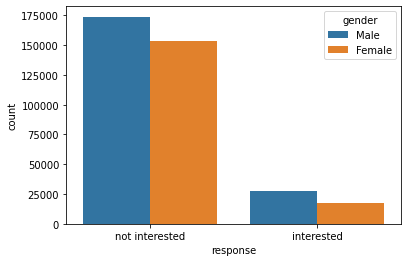

In [0]:
ax = sns.countplot(data = df_parquet, x = 'response', hue = 'gender')
ax.set_xticklabels(['not interested', 'interested'])

In [0]:
# Há mais homens interessados no seguro dos que mulheres

Out[31]: [Text(0, 0, 'No'), Text(1, 0, 'Yes')]

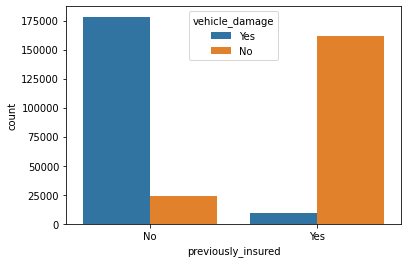

In [0]:
ax = sns.countplot(data = df_parquet, x = 'previously_insured', hue = 'vehicle_damage')
ax.set_xticklabels(['No', 'Yes'])

Out[32]: <matplotlib.legend.Legend at 0x7f687ae88c70>

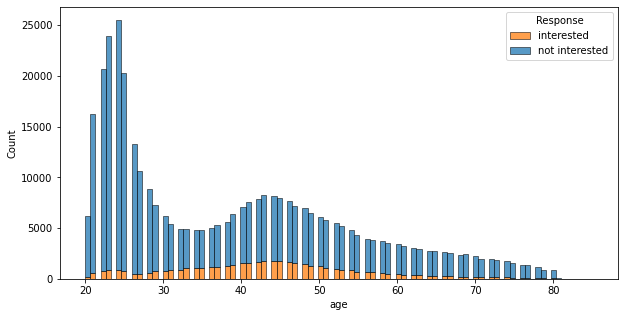

In [0]:
plt.subplots(figsize=(10,5))   
sns.histplot(data = df_parquet, x = 'age', hue = 'response', multiple="stack")
plt.legend(title = "Response", labels=['interested', 'not interested'])

In [0]:
# Pessoas de 20 a 30 anos tendem a ter menos interesse pelo seguro de carro. Dos 30 aos 50 anos esse interesse aumenta

Out[34]: <matplotlib.legend.Legend at 0x7f687aca7310>

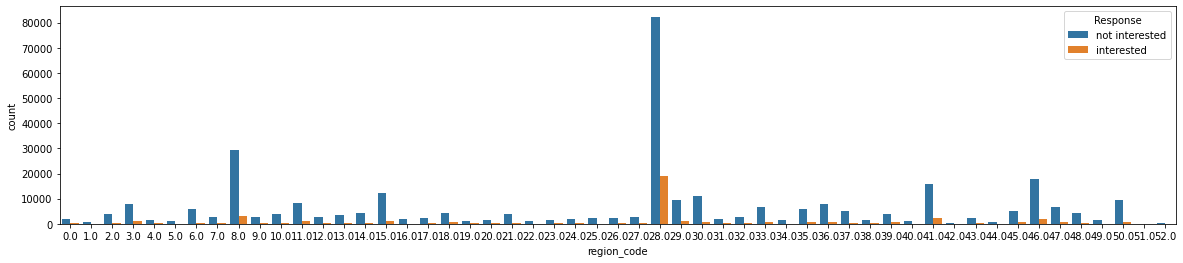

In [0]:
plt.subplots(figsize=(20,4))   
sns.countplot(data = df_parquet, x = 'region_code', hue='response')
plt.legend(title = "Response", labels=['not interested', 'interested'])

In [0]:
# A região 28 por ser uma região que possuem mais pessoas com plano de saúde, provalmente também é uma região mais populosa e esparava-se que teriam mais pessoas interessadas em um seguro de carros, mas não é o que acontece

Out[36]: <matplotlib.legend.Legend at 0x7f6878a6c460>

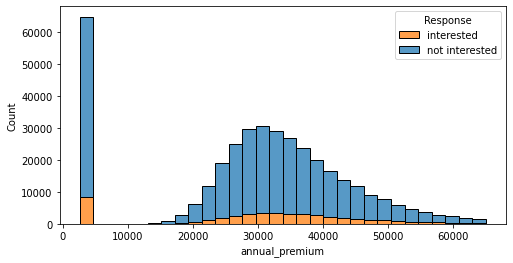

In [0]:
plt.subplots(figsize=(8,4))   
sns.histplot(data = df_parquet, x = 'annual_premium', hue = 'response', bins=30, multiple="stack")
plt.legend(title = "Response", labels=['interested', 'not interested'])

In [0]:
# Não nota-se uma relação de quanto a pessoa paga pelo seguro de saúde com o interesse da mesma em ter um seguro de carro, o gráfico segue uma normal para as duas

In [0]:
# Resumo:
# Interessados:
# Já tiveram seguro previamente
# Já tiveram algum sinistro no veículo
# Veículos com mais de 2 anos
# Pessoas de 30 a 50 anos

In [0]:
# Mais análises:

#Policy Sales Channel
#Região com maior número de pessoas
#Idades com a menor diferença entre interessados e não interessados